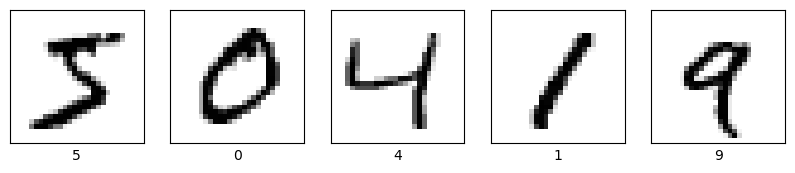

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 22, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,402 (388.29 KB)

 Trainable params: 98,922 (386.41 KB)

 Non-trainable params: 480 (1.88 KB)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 107ms/step - accuracy: 0.8282 - loss: 0.6869
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 181s 96ms/step - accuracy: 0.9709 - loss: 0.1079
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 221s 118ms/step - accuracy: 0.9791 - loss: 0.0770
Accuracy of the model: 96.4600%
Predictions on first 5 test images:


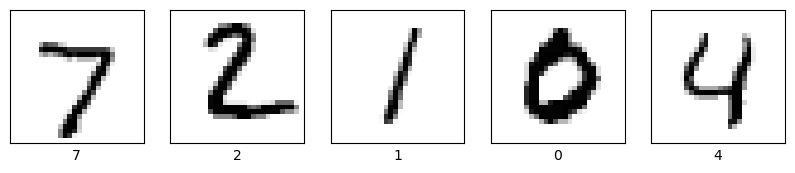

In [7]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

def plot_imgs(images, labels=None):
    """
    Plot a grid of images with optional labels.

    Args:
        images (np.array): Array of images to plot.
        labels (list): Optional list of labels for the images.
    """
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10, 2 * subplots_x))
    for i in range(min(len(images), subplots_x * 5)):
        plt.subplot(subplots_x, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot the first 5 training images with labels
plot_imgs(x_train[:5], y_train[:5])

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert datasets of shape (num_points, 28, 28) to (num_points, 28, 28, 1)
x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]

def block_tf(filters, kernel_size, stride):
    """
    Create a convolutional block consisting of a Conv2D layer, BatchNormalization, and ReLU activation.

    Args:
        filters (int): Number of filters in the Conv2D layer.
        kernel_size (int): Size of the kernel in the Conv2D layer.
        stride (int): Stride of the Conv2D layer.

    Returns:
        list: List of layers forming the convolutional block.
    """
    return [
        tf.keras.layers.Conv2D(filters, kernel_size, strides=(stride, stride), activation=None),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU()
    ]

# Define the network
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((28, 28, 1)))
for layer in block_tf(16, 3, 1):
    model.add(layer)
for layer in block_tf(32, 3, 1):
    model.add(layer)
for layer in block_tf(64, 3, 1):
    model.add(layer)
for layer in block_tf(128, 3, 1):
    model.add(layer)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation=None))

# Display the model architecture
model.summary()

# Define the loss function and optimizer
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3)

# Evaluate the network
logits = model(x_test)
predictions = tf.argmax(logits, axis=1)
accuracy = tf.reduce_mean(tf.cast(predictions == y_test, tf.float32)).numpy() * 100
print(f'Accuracy of the model: {accuracy:.4f}%')

# Plot predictions on the first 5 test images
print('Predictions on first 5 test images:')
plot_imgs(np.squeeze(x_test * 255, axis=-1)[:5], predictions.numpy()[:5])


In [11]:
x_train.shape

(60000, 28, 28, 1)